# Assignment #01 - Introduction to ML tools


Deep Learning / Fall 1399, Khatam University



---



**Please pay attention to these notes:**
<br><br>


- **Assignment Due:** <b><font color='red'>1399/9/7</font></b> 23:59:00
- If you need any additional information, please review the assignment page on the course website.
- The items you need to answer are highlighted in <font color="purple">**bold purple**</font> and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, **each student has to finish all the questions by him/herself**. If our matching system identifies any sort of copying, you'll be responsible for consequences.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Microsoft Teams channel.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of the depencecies.
- You can double click on collapsed code cells to expand them.
- <b><font color='red'>When you are ready to submit, please follow the instructions at the end of this notebook.</font></b>


<br>




---



# Introduction

In this assignment, you will:
- Work with some famous machine learning libraries such as **NumPy, Pandas, Matplotlib** and **sklearn** 
- Learn how to visualize data
- Solve a simple practical classification task 



Most of the required libraries including numpy, pandas, and matplotlib are already installed on colab environment; However, in this assignment you are going to use **Basemape** toolkit for matplotlib which is not installed. So please run the following cell and restart your runtime to finish the installation before going through the rest of the assignment:  

In [ ]:
#@title Install Basemap! (run the cell and restart your runtime afterward)
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

# 1 . Covid-19 

There is no doubt that everyone's life has been through many changes since Corona-Virus appeared. It is the most serious concern in the world right now, and many attempts have been made to help the world recover. Hence, machine learning has been widely used all over the globe, to either predict the future or describe the current situation of the disaster. 

The first step to every machine learning problem is to have an insight into the data. In this assignment, we are going to take a look at how Covid-19 has been spread over the world, by visualizing the number of cases over time.



*   <font color='green'>First download the data by running the following cell:</font> 




In [ ]:
#@title Download the data!
from IPython.display import clear_output

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GqeCnO2TUI4kDqsxVZYdMGL6J3mvsIrS' -O Confirmed.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1o0OonLudsargCRJ8q4NTUhlgDZdJJ-xd' -O Death.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1o9rqSNL6XrjayYHBYZxyY60NkOgRTSFz' -O Recovered.csv

clear_output()
print ("Done!")


*   <font color='green'>Now read the dataset in Pandas DataFrame format using the following cell:</font> 



In [ ]:
#@title Read the datasets!
import pandas as pd

confirmed = pd.read_csv ("/content/Confirmed.csv")
death = pd.read_csv ("/content/Death.csv")
recovered = pd.read_csv ("/content/Recovered.csv")

print ("Done!")


*   <font color='green'>Now let's take a quick look at the "confirmed" dataset:</font> 


In [ ]:
#@title Take a look!
recovered.head(n=10)


In this part, you are going to <font color="purple">**create a simple scatter plot comparing the trend of confirmed, dead, and recovered cases in Iran**</font> (Country/Region = Iran) by following these steps:

Your plot should be similar to this one (drawn for United States) and have the following properties:

*   <font color='green'>a single 45 degree angled X-axis tick per 20 days</font> 
*   <font color='green'>a legend</font> 
*   <font color='green'>axis labels</font> 
*   <font color='green'>log-scaled Y-axis</font> 



<p align="center"><img src="https://drive.google.com/uc?id=10yvruyXcJbYC302pOg1x0hI4ynhTgNQc" width="600"/></p>




In [ ]:
#@title Your part #1

########################################
#     Put your implementation here     #
########################################



You can draw markers on the map with different sizes using the following function:

In [ ]:
#@title draw_on_map function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap



def draw_on_map (color="r", markersize=20, lon=0, lat=0, ax=None):
    """
    Draws markers on the map on specified longitudes and latitudes  

    Parameters
    ----------
    color : str/list of str
        A single string indicating the color of all the markers or 
        a list of strings indicating the color of each marker. Possible
        string values are "r" for red, "g" for green, "y" for yellow and
        "b" for blue.

    markersize : integer/list of integer
        A single integer indicating the radius of all the markers or 
        a list of integers indicating the radius of each marker.
        
    lon : integer/list of integer
        A single integer indicating the longitude of a single marker or 
        a list of integers indicating the longitude of each marker.


    lat : integer/list of integer
        A single integer indicating the latitude of a single marker or 
        a list of integers indicating the latitude of each marker.

    ax : matplotlib.axes
        The matplotlib axes on which the plot is drawn.

    """
    ax.clear()
    
    m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax)

    m.drawcoastlines(color='white', linewidth=.7)
    m.drawcountries(color='white', linewidth=.7)
    m.drawmapboundary(fill_color='black')
    xpt,ypt = m(lon,lat)
    ax.scatter (xpt,ypt, color=color, s=markersize, alpha=0.5)



######## testing the function ########

iran_lon = 53.6880
iran_lat = 32.4279 

us_lon = -95.7129
us_lat = 37.0902

fig, axis = plt.subplots (figsize=(20,10))

draw_on_map(color=["r", "g"],
            markersize=[300, 300],
            lon=[iran_lon, us_lon],
            lat=[iran_lat, us_lat],
            ax=axis)

fig.show()

Now, using the above function, you must <font color="purple">**implement the following `vis_covid` function which takes the time index `i` and a `dataset` as input and draws markers on the longitudes and latitudes specified in the dataset. The radius of each marker must correspond to the number of cases indicated for the i-th time entry of that specific longitude and latitude which the marker is drawn for; The larger the number of the cases, the bigger the radius of the marker.** </font>

For example, if we pass the "confirmed" dataset, for `i = 0`, `100` and `200` (which specify dates `1.22.2020`, `5.1.2020` and `8.9.2020` respectively), we should get the following outputs:
</br>



<p align="center"><img src="https://drive.google.com/uc?id=1gfu6LBhffwd0tx78VKy5T9IAwM_TbJwy" width="1100"/></p>



In [ ]:
#@title Your part #2

def vis_covid (i, color, dataset, ax):
    """
    Draws markers on the map on specified longitudes and latitudes  

    Parameters
    ----------
    i : integer
        A single integer indicating the index of time entry in the dataset.

    color : str
        A single string indicating the color of all the markers.
        
    dataset : pandas.DataFrame
        The given dataset to be visualised.

    ax : matplotlib.axes
        The matplotlib axes on which the plot is drawn.

    """

    ########################################
    #     Put your implementation here     #
    ########################################



######## testing the function ########

fig, axis = plt.subplots (figsize=(30,15))
vis_covid (200, "r", confirmed, axis)
fig.show()


Now let's make an animation using the function you just implemented! (this may take a while, be patient)

In [ ]:
#@title Create the animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import clear_output
rc('animation', html='jshtml')

fig, axis = plt.subplots (figsize=(15,8))
frames = 60

def animate(i):
  clear_output()
  print ("frame ", i, "/", frames, " rendered!")
  vis_covid (i*4, "r", confirmed, axis)
  

ani = FuncAnimation(fig, animate, frames=frames, interval=30);
ani.save('covid_spread.gif', writer='pillow', fps=30, dpi=50);

In [ ]:
#@title Display the animation!
from IPython.display import Image
Image(open('/content/covid_spread.gif','rb').read())

# 2 . Fa_MNIST 

Now let's have some fun with NumPy! In this assignment, we are going to implement the **K-means** clustering algorithm using NumPy and apply it to some image data.

We are going to use ["Hoda": a Persian hand-written digits dataset](http://farsiocr.ir/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%AF%D8%A7%D8%AF%D9%87/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%A7%D8%B1%D9%82%D8%A7%D9%85-%D8%AF%D8%B3%D8%AA%D9%86%D9%88%DB%8C%D8%B3-%D9%87%D8%AF%DB%8C/) for this assignment. Let's download the dataset by running the following cell:

In [ ]:
#@title Download the data!
from IPython.display import clear_output

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sd5hIgupwPipkokqIXhD5qcKgHxl7C8B' -O Data.np
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SWdZMXWkHAgTuCcuz3Ydm81hgWwi-bYe' -O Label.np

clear_output()
print ("Done!")

In [ ]:
#@title Read the datasets!
import numpy as np

data = np.load("/content/Data.np", allow_pickle=True)
labels = np.load("/content/Label.np", allow_pickle=True)

print ("The dataset is a",
       type(data),
       "with",
       len(data),
       type(data[0]),
       "elements!")
print ("data.shape is:", data.shape)

As you can see, our dataset is an array of arrays. However, the dimension of the array is one, which means the elements are stored as objects since they have different shapes. We can observe this fact if we visualize a few instances of our data:

In [ ]:
#@title Visualize!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = np.random.randint(data.shape[0], size=10)
sampled = data[sampled_indices]
sampled_labels = labels[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

In most of the machine learning algorithm pipelines, we usually want our image dataset to have a consistent sample shape. Therefore, the first step is normally to either pad or crop the images to make them square-shaped, and then rescale the images to make them have the same size.
Here, you are going to <font color="purple">**implement a function which given the initial dataset and a final output image size S**</font>:
 

1.   <font color='green'>For each image in the dataset, if its width is greater than its heigh, pad the heigh equally from both sides with 0 until it's equal with the width, and vice-versa.</font> 
2.   <font color='green'>Scale each image to have shape (S, S). You can use [OpenCV resize](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/) method for this purpose</font>  


In [ ]:
#@title Your part #1
import numpy as np
import cv2


def reshape_images(dataset, size):
  """
  Pads and rescales images in the given dataset.  

  Parameters
  ----------
  dataset : numpy.array/list of numpy.arrays
      The given dataset on which we are doing the padding and scaling on.

  size : integer
      The final shape of each image will be (size, size) 


  Returns
  -------
  reshaped_dataset : numpy.ndarray
  
  Final reshaped dataset as a numpy ndarray with shape (len(dataset), size, size)

  """

  ########################################
  #     Put your implementation here     #
  ########################################


######## using the function ########

scaled_data = reshape_images(data, size=28)
scaled_data.shape

assert scaled_data.shape == (60000, 28, 28), "Your output shape is wrong!"


Now, each sample is a 28x28 pixel image. 
Let's visualize few samples again to see the result of scaling:

In [ ]:
#@title Visualize!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = np.random.randint(scaled_data.shape[0], size=10)
sampled = scaled_data[sampled_indices]
sampled_labels = labels[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

Nice and easy! 

The most simple representation of each sample would be if we consider the value of each pixel as a feature, hence representing each image with a 784-d vector (28x28 = 784).

In [ ]:
#@title Pixle values as image features
data_flatten = scaled_data.reshape((scaled_data.shape[0], -1))
print ("New dataset shape is ", data_flatten.shape)

It is always nice if possible to observe your data points visually. However, in this case, our data points are in a 784-dimensional space, and can not be plotted as they are. Using **PCA (principal component analysis)**, we can find the n-most important directions of the space on which our data is scattered (n directions in which the most variance of the data is explained). So, using this technique we can reduce the dimensions to 2 and have a visualization of our data:

In [ ]:
1#@title PCA visualization
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2).fit(data_flatten)
data_transformed = pca.transform(data_flatten)


fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter (data_transformed[:,0], data_transformed[:,1], marker=".", c=labels, cmap="Paired")
classes = list(range(10))
ax.legend(handles=scatter.legend_elements()[0], labels=classes)
ax.axis('off')
fig.show()

As you can see, some of the numbers are overlapping more than the others (1, 2, and 3); On the other hand, some of them are clearly separated (7 and 8). This is caused by the way we represented our images. All a neural network does is to find a better representation for each image (by finding more meaningful and distinct features than raw pixel values) to make them more separated in the representation space. 

Anyway, this is not what we are here for, not yet! We want to <font color="purple">**implement K-means**</font>, a well-known clustering algorithm! 

Clustering is one of the most common exploratory data analysis techniques used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are more similar (based on a pre-defined similarity measure, often euclidean distance) than data points in different clusters. 

to implement K-means, follow these steps:


*   <font color='green'>Pick K random points as cluster centers called centroids.</font>
*   <font color='green'>Assign each data point​ to nearest cluster by calculating its euclidean-distance to each centroid.</font>
*   <font color='green'>Update the centroid to be the average of the assigned points.</font>
*   <font color='green'>Repeat Step 2 and 3 for some itterations.</font>

Look at this animation for a better understanding:

<p align="center"><img src="https://drive.google.com/uc?id=1FSWGOksL90HWIb6Zr5SY2strXml9kvHG" width="400"/></p>

To encourage using NumPy methods, <font color='red'> you are allowed to only use 3 for loops </font> (one of which is the outermost iterations loop! So, practically 2 loops are allowed).




In [ ]:
#@title Your part #2
from tqdm.notebook import tqdm

iterations = 10
k = 40
dataset = data_flatten
centroids = np.random.randint(100, size=(k, 784))

for iteration in tqdm(range(iterations)):

  ########################################
  #     Put your implementation here     #
  ########################################


Now let's do something fun to see if your K-means implementation is correct. Each cluster center is a vector of 784 dimensions. However, we can reshape it back to a 28 by 28 image and visualize it. So let's do this and see if our cluster centers look anything like our data points:

In [ ]:
#@title Visualize centroids
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 5, figsize=(10,5))

for row in range (8):
  for col in range (5):
    ax[row][col].imshow(centroids[row*5+col].reshape(28,28), cmap='gray')
    ax[row][col].axis('off')
fig.show()

# 3 . Sentiment Analysis

Now that you have worked with two type of data (tabular, image), let's step into a new genre, **Text**! From another point of view, you already encountered *clustering* as a major class of unsupervised learning. Now we will face a **Classification** problem, from the category of supervised learning problems. (Some other types of problems/tasks are listed in [section 5](https://www.deeplearningbook.org/contents/ml.html).1.1 of the deeplearningbook.)

Here in the last assignment, the main task is to classify [user comments on Digikala products](https://www.digikala.com/opendata/) into three classes:
<font color="green">
* Positive
</font>
* Neutral
<font color="red">
* Negative
</font>

We will follow a step by step procedure together:


1. <font color="green"> Load, clean our (or more precisely *Digikala's*) datset with **pandas**
</font>
<font color="green">
2. Transform data, define and fit our model on the data using **scikit-learn**
</font>
<font color="green">
3. Evaluate our model based on quantitative measures and manual (qualitative) inspection
</font>


Let's start by downloading the data...

In [ ]:
#@title Download the data!
from IPython.display import clear_output

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1lb7gyXkI4Cs4Pp038_iKrcnVg9yeQcou' -O digikala_comments.xlsx

clear_output()
print("Done")

In [ ]:
# @title Read xlsx data
import pandas as pd
df = pd.read_excel('/content/digikala_comments.xlsx')
df.head(3)

There are many columns in the table, but we need only two of them. The easier one is the `comment` column as the textual input to our problem. what about the other (the output / answer / label / target...)?

As the data does not contain the score submitted by users, we use another column that shows polarity of the user opinion about the product. It's the `recommend` column. When the user recommends others to buy the product, he/she surely thinks positive about that product and vice-versa. right? <font color="purple">**Have any problem with this? Explain it.**</font>



<font color="purple">  --- **Put your answer here!** ---</font>
</br>


Maybe you're right, but we have no way out of this! :)
If we dont take it hard about the label, we are doing [Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) on the user comments...

## Clean dataset

Our label column is one of these values for each comment:

In [ ]:
df.recommend.unique()

<font color="purple">**Add a new column named `label` to the DataFrame based one the `recommend` column. assign `1`, `0`, `-1` values to `recommended`, `no_idea`, `not_recommended`, respectively.**</font>


In [ ]:
#@title Your part #1

########################################
#     Put your implementation here     #
########################################

df.head(3)

<font color="purple">**Drop rows with missing values of `recommend` (any value other than `recommended`, `no_idea`, `not_recommended`).**</font>

In [ ]:
#@title Your part #2

########################################
#     Put your implementation here     #
########################################

len(df)

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


63618

<font color="purple">**Drop all useless columns, including the old `recommend` column.**</font> Dont doubt if it seems too easy! :)

In [ ]:
#@title Your part #3

########################################
#     Put your implementation here     #
########################################

df.head(3)

Now let's check the `comment` column. How about its character lenght?

**First Change `df` in the below cell to your current version of DataFrame!**

In [ ]:
# @title Frequency of comments by char length
hist = df.comment.str.len().plot.hist(bins=500, figsize=(20, 4))

As you see in the histogram, some comments are too short and some others are toooo long.

<font color="purple">**Choose values which you think are the best for min and max character length of comments and drop those short/long comments.**</font>

In [ ]:
MIN_CHAR_LEN =  #@param {type:"integer"}
MAX_CHAR_LEN =  #@param {type:"integer"}

#############
clean_df = df[(df.comment.str.len() > MIN_CHAR_LEN) & (df.comment.str.len() < MAX_CHAR_LEN)]
#############

hist = clean_df.comment.str.len().plot.hist(bins=(MAX_CHAR_LEN-MIN_CHAR_LEN)//5, figsize=(20, 4))

It's time to check how many examples are remaining for each label...

In [ ]:
print('label\tcount')
clean_df.label.value_counts()

Seems more than half of the comments are labeled positive! This means we have an **unbalanced** dataset and this is bad news!

We don't know how to deal with an unbalanced data (Is it realy a special case?), so <font color="purple">**make the dataset balanced by taking maximum possible equal number of examples for each label.**</font>

In [ ]:
#@title Your part #4

########################################
#     Put your implementation here     #
########################################

print('label\tcount')
balanced_df.label.value_counts()

...and say goodbye to pandas, by extracting values of comments, labels from the final DataFrame (next cell).

In [ ]:
texts = balanced_df.comment.astype(str).values
labels = balanced_df.label.values

list(zip(texts[:3], labels[:3]))

It is a common practice to split datasets into separate train and test sets. in order to evaluate the generalization power of our model, the model shouldn't have seen any examples from test set.

We take 20% of the examples as test set and will not use them until evaluation part...

In [ ]:
# @title Split dataset 

from sklearn.model_selection import train_test_split

texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.20,
    random_state=10, 
    stratify=labels      # what does it do?
  )     
print(len(texts))
len(texts_train), len(texts_test)

## Vectorize Text

We cannot give text as a string input to a machine learning model, because they can understand numerical vectors. How do you make a numerical vector out of a (problably long) string?!
<font color="green">
* It already has a numerical (binary) representation in system memory? Riiight, But... 
* Split text it into smaller parts? good idea! into what? word or character or...? and then?</font>

First we wil split our text into words, as they are the smallest meaningful units of text. This is called **tokenizing**. As the comments are in Persian, it is better to use a Persian tool to process our comment. We (install and) use [hazm](https://github.com/sobhe/hazm/) just to tokenize comments, but it has much more to do... Another library for processing Persian is [parsivar](https://github.com/ICTRC/Parsivar). 

Check those libraries if you are realy interested in NLP...

In [ ]:
# @title install hazm
from IPython.display import clear_output
!pip install hazm
clear_output()

In [ ]:
# @title Tokenize a comment
from hazm import word_tokenize

word_tokenize(texts_train[10])

After tokenization, we use one of the simplest methods of vectorizing/representing text, [Bag-of-Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

You can learn about **B**ag-**o**f-**W**ords [here](https://maelfabien.github.io/machinelearning/NLP_2). In a single sentence, it turns a text into a n-dimensional integer vector, where each item indicates number of ocurrances of a specific word in the text.

<font color='purple'>**Is Bag-of-Words a good representation of text? Does it miss some useful information? Is it possible that BoW makes a positive comment look like negative, vice-versa? Explain by giving examples.**</font> 


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

If you know how BoW works, it's time to get our hands dirty with scikit-learn. BoW is implemented as `CountVectorizer` there...

In [ ]:
# @title Count Vectorizer (BoW)
from sklearn.feature_extraction.text import CountVectorizer

MIN_DF =  # @param {"type": "integer"}
MAX_DF =  # @param {"type": "number"}
MAX_FEATURES =  # @param {"type": "integer"}

vectorizer = CountVectorizer(
    tokenizer=word_tokenize,
    min_df=MIN_DF,
    max_df=MAX_DF,
    max_features=MAX_FEATURES
)

?vectorizer   # shows documentation for the vectorizer object

In [ ]:
X_train = vectorizer.fit_transform(texts_train)     # returns a sparse matrix (not dense)
X_test = vectorizer.transform(texts_test)

y_train = labels_train
y_test = labels_test

X_train.todense().shape, X_test.todense().shape     # convert sparse to dense matrix (normal 2d array)

((18789, 6778), (4698, 6778))

<font color='purple'>**Read scikit-learn docs on `CountVectorizer` and explain what is the meaning and benefit of setting these parameters:**
* **min_df**
* **max_df**
</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

## Fit, Evaluate Classifier

We chose **K-Nearest-Neighbor** model to fit on our data. As the name clearly suggests, KNN predicts the class of a new data point, by voting from k nearest neighbors of it (from training set). Neighbours are computed using a distance measure in our feature space.

Here you can see how KNN works in a 2D input space:

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif" width="640px">

This model and some other similar models are explained in [scikit-learn tutorial](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification).

Let's fit and evalute the model with a few lines of code...

In [ ]:
# @title Define, Fit KNN model
%%time
from sklearn.neighbors import KNeighborsClassifier

K =  # @param {"type": "integer"}

classifier = KNeighborsClassifier(n_neighbors=K)
classifier.fit(X_train, y_train)

In [ ]:
%%time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_test = classifier.predict(X_test)
print(accuracy_score(y_test, pred_test))

As you can see, fitting KNN on data takes no time. But using it for prediction (on smaller count of data) takes considerable time!

This is because KNN is a **lazy model** or a [lazy learning algorithm](https://en.wikipedia.org/wiki/Lazy_learning)! All of its computations are happening at inference/prediction time. Fitting the model just stores training data to use it later!

By changing parameter `K` in the cells above, you will see it has a significant effect on accuracy of the model. The question is *which k value, leads to the highest accuracy?* A deeper question would be *which evaluation metric (other than accuracy) best describes the quality of our model?* 

First, add three new items to your set of evaluation metrics:
* [Precision](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [F1-Score](https://en.wikipedia.org/wiki/F-score)

If you're not familiar with each one, read enough to understand it deeply. You will see them everywhere in machine learning literature. 

Now we are going to search for best value of k to maximize an evaluation metric. There are standard ways to do parameter search in scikit-learn, but let's do it our way, visualy. We want to plot the result of each metric for different values of k, to gain insight about how k affects model quality.

<font color="purple">**Implement the `plot_metrics_by_k` function which plots the score of the model on test set based on each metric, given a list of k values `ks`.**
* **Plot each metric separately (4 plots in total).**
* **Use logarithmic scale on horizontal axis (k).**
* **Precision, Recall, F1-Score are calculated separately for each label (3 lines in each plot).**</font>

Scikit-learn has implemented functions for each metric. You'll need to prepare labels and model predictions for them and do some dirty work with matplotlib! :)

In [ ]:
#@title Your part #5

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_metrics_by_k(ks, X_train, y_train, X_test, y_test):
  ########################################
  #     Put your implementation here     #
  ########################################


ks = [2**i+1 for i in range(1, int(math.log(X_train.shape[0], 2))+1)] + [X_train.shape[0]]
plot_metrics_by_k(ks, X_train, y_train, X_test, y_test)

<font color="purple">**According to the plots:**
1. **Which value of K leads to highest model quality? (Based on which metric?)**</font>
2. <font color="purple">**What happens to the model when we increase k too much (based on each metric)? Why?**</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

If you are not satisfied with the quality of your classifier (or even if you are!), you can improve it in many ways. One of them is using a better vectorizer.

There is an extension to BoW, called **Term Frequency-Inverse Document Frequency (TF-IDF)**. Read about it [here](https://maelfabien.github.io/machinelearning/NLP_2). And You can use it with the same parameters from `CountVectorizer`.

In [ ]:
# @title TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

MIN_DF =  # @param {"type": "integer"}
MAX_DF =   # @param {"type": "number"}
MAX_FEATURES =  # @param {"type": "integer"}

vectorizer = TfidfVectorizer(
    tokenizer=word_tokenize,
    min_df=MIN_DF,
    max_df=MAX_DF,
    max_features=MAX_FEATURES
)

In [ ]:
X_train = vectorizer.fit_transform(texts_train)     # returns a sparse matrix
X_test = vectorizer.transform(texts_test)

X_train.todense().shape, X_test.todense().shape

((18789, 6778), (4698, 6778))

Plot the test accuracy again with the new training, test set, transformed by TF-IDF...

In [ ]:
ks = [2**i+1 for i in range(1, int(math.log(X_train.shape[0], 2))+1)] + [X_train.shape[0]]
plot_accuracy_by_k(ks, X_train, y_train, X_test, y_test)


<font color="purple">**Did TF-IDF improve the results significantly? If true, explain why?**</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

## Manual Inspect

Pick the best parameters for your KNN model. Also make sure the correct version of data (vectorized by best vectorizer) is used to fit the model...


In [ ]:
# @title Define, Fit best model

from sklearn.neighbors import KNeighborsClassifier

K = 20 # @param {"type": "integer"}

classifier = KNeighborsClassifier(n_neighbors=K)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

By looking at the Confusion Matrix below, you can see which label is harder for the model to predict...

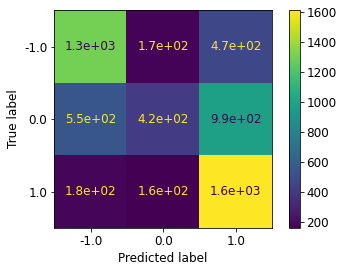

In [ ]:
# @title Plot Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12

plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

<font color="purple">**According to the confusion matrix,**
1. **Predicting which label is the easiest for the model?**</font>
2. <font color="purple">**Which one is the hardest? Why?**</font>
3. <font color="purple">**Which label does the model confuse the hardest one with!?!? Why?**
</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

Now that you know the weakness point of your model, let's manually test it to see if the numbers are right about it, or not?

in the following code cell, you can input your desired text, see the sentiment predicted by model, and see which examples are nearest neighbors of the input and cause the model to make that prediction.

In [ ]:
# @title Get Neighbors
text = "" # @param {"type": "string"}

x = vectorizer.transform([text])

print('predicted sentiment:\t', classifier.predict(x), '\n')
distances, indexes = classifier.kneighbors(x)

for distance, index in zip(distances[0], indexes[0]):
  print(f'label: {labels_train[index]}\ndistance:{distance}\n{texts_train[index]}\n')
# neighbors

<font color="purple">**Based on manual inspection, which one of the followings is the main source of errors?**
1. **The KNN algorithm**
2. **The vectorization method**
3. **Tokenization**
3. **Or the dataset**
**No problem if you feel that everyone is guilty! :)
Justify your explanation with examples.**
</font>


<font color="purple">  --- **Put your answer here!** ---</font>
</br>

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instructions:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. **Fill your information** & run the cell bellow.
4. Run **Make Submission** cell, It may take several minutes and it may ask you for your credential.
5. Run **Download Submission** cell to obtain your submission as a zip file.
6. Grab the downloaded file (`dl_asg01__xx__xx.zip`) and hand it over in microsoft teams.

## Fill your information (Run the cell)

In [ ]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id = "" #@param {type:"string"}
student_name = "" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg01')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

## Make Submission (Run the cell)

In [ ]:
#@title Make submission
! pip install -U --quiet PyDrive > /dev/null
! pip install -U --quiet jdatetime > /dev/null

# ! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 


import os
import time
import yaml
import json
import jdatetime

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'Assignment 1'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
# repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg01__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'dateime': str(jdatetime.date.today()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

In [ ]:
files.download(submission_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>